# Assignment Netwerkanalyse

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: alleen de hoofdletter (dus voor de groep van Marx zou je `A` kiezen)

__Namen__:Anoniem
__Emails__:Anoniem
__Student id__:Anoniem
__Groep__:Anoniem

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Week 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import networkx as nx
import requests
from nose.tools import assert_equal, assert_count_equal
from itertools import combinations
from collections import defaultdict

In [2]:
range?

# Deel -1

* Verzamelingen
    * Maak alle opgaven op [deze site](https://set.kuleuven.be/voorkennis/zomercursus/zomercursusZ/logica/verzamelingen_light). Dus ook die in sectie 2.1 en 2.1.1! 

# breadth first search

In [3]:
# Nu met een lijst voor frontier, dus net als in slides en het boek
# Dit zorgt dat het echt breadth first gaat, omdat we steeds van voren pakken
# en nieuwe knopen er achter aan plakken
def verbonden(G):

    start = list(G.nodes)[0] # pak een knoop
    gezien = set()
    frontier = [start]
    while frontier:
        #print (frontier, gezien)
        gezien = gezien | set(frontier)
        node = frontier[0]
        nieuwe_buren= [x for x in G if G.has_edge(x,node) and not x in gezien]
        frontier = frontier[1:] + nieuwe_buren
    return gezien == set(G.nodes)

verbonden(G)

NameError: name 'G' is not defined

# Deel 0: First Course Chap 1

*  First Course Chap 1, alle overige opgaven (dus vanaf 22) (plus opnieuw die je vorige week fout had)

# YOUR ANSWER HERE
1.22) minimum degree = 2, maximum degree= 5, mean degree= 3, density= 0.6
1.23) Nee, want het kan dat een bepaalde node meer edges heeft, en de andere node misschien maar 1 edge. De mean degree en density blijft in dit 
       geval wel hetzelfde.
1.24) - de density zal toenemen en dichter bij 1 komen, omdat meer mensen met elkaar vrienden zijn.
      - De density zal hetzelfde blijven. Zowel de edges als de nodes verdubbelen waardoor je dezelfde uitkomst behoudt.
1.25) 33.000.000 * 1000 = 33.000.000.000. Sparse omdat er nog veel en veel meer links mogelijk zijn.
1.26) increased. de density gaat omhoog, omdat er meer users zijn.

# Deel 1: MacBeth

In [4]:
def open_graph():
    """Loads the graphml"""
    if 'macbethcorrected.graphml' in os.listdir():
        return nx.read_graphml('macbethcorrected.graphml')
    elif os.path.exists('../../data/Week2'):
        return nx.read_graphml('../../data/Week2/macbethcorrected.graphml')
    elif os.path.exists('../../../data/Week2'):
        return nx.read_graphml('../../../data/Week2/macbethcorrected.graphml')

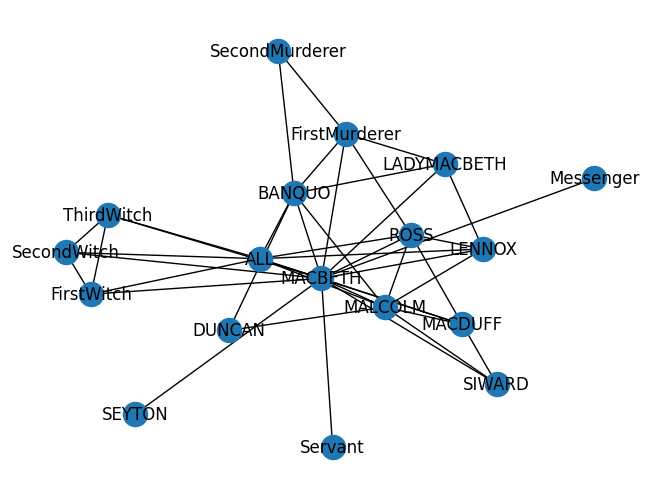

In [5]:
MacB = open_graph()
nx.draw(MacB, with_labels=True)

## Vraag 1
 
In deze vraag gaan we kijken naar de vorm van deelgrafen in MacB. We vragen ons voor elke hoeveelheid knopen af, hoeveel verschillende "vormen" deelnetwerken met zoveel knopen er in MacB zitten.

Voorbeeld: met 2 knopen hebben we ook 2 "vormen" in MacB, namelijk de twee knopen onverbonden, en de twee knopen verbonden. Met drie knopen zijn er meer mogelijkheden (vogel ze zelf uit), en het is de vraag of we die ook allemaal terugzien in MacB. 

Alle deelnetwerken van dezelfde vorm noemen we isomorf. 

Geef voor `n in range(5)` het aantal niet isomorfe deelnetwerken in MacB met `n` knopen als een dict met het aantal knopen als sleutel en het aantal niet isomorfe deelnetwerken als waarde. 

**Hint:** teken voor elk aantal knopen eerst zelf alle mogelijke niet isomorfe netwerkjes die je met zoveel knopen kunt maken, en ga dan op zoek in de Macbeth graaf of je die allemaal kunt vinden.  Voor $n=2$ zijn er 2 mogelijke niet isomorfe netwerkjes: $\langle\{1,2\},\emptyset\rangle$ en $\langle\{1,2\},\{(1,2)\}\rangle$.

**Tip:** Je mag dit natuurlijk programmeren, maar het hoeft niet. 


In [6]:
iso_types = {n: }
#WRITE YOUR CODE HERE
{0: 1, 1: 2, 2: 3: 4, 4:11  } 
iso_types

SyntaxError: expression expected after dictionary key and ':' (3634339909.py, line 1)

In [7]:
assert_equal(type(iso_types), dict)
assert_equal(len(iso_types),5)
assert_equal(set(iso_types.keys()),set(range(5)))

for n in iso_types:
    assert isinstance(iso_types[n], int)

NameError: name 'iso_types' is not defined

## Vraag 2
Bereken voor ieder personage zijn "degree" en zijn "neighbour set". Stop dit in een dictionary genaamd `personage_dict` waar de key het personage is en de value een tuple (een paar in dit geval)  met eerst de degree en dan de neighbour set in de vorm van een lijst.

* Voorbeeld:
`{FirstWitch: (4, ['ALL', 'ThirdWitch', 'MACBETH', 'SecondWitch'])...}`
* Hint: gebruik weer een dict comprehensie. Dit kan in 1 regel.

In [8]:
personage_dict = {d: for personage in MacB }
#WRITE YOUR CODE HERE
len(personage_dict),personage_dict['MACBETH']

SyntaxError: invalid syntax (519372524.py, line 1)

In [9]:
assert_equal(type(personage_dict), dict)
assert_equal(type(list(personage_dict.values())[0]), tuple)
assert_equal(type(list(personage_dict.values())[0][0]), int)
assert_equal(type(list(personage_dict.values())[0][1]), list)
assert_equal(type(list(personage_dict.values())[0][1][0]), str)


NameError: name 'personage_dict' is not defined

## Vraag 3
Maak de lijst met alle maximale cliques **die (strict) meer dan 3 knopen bevatten** in de Macbeth graaf.

Geef een maximale clique weer als een lijst van de knopen (dus een lijst in een lijst). Noem deze `cliques`

Zorg dat alle lijsten alfabetisch gesorteerd zijn, ook de buitenste lijst. Dus je krijgt:

```
[['ALL', 'BANQUO', 'MACBETH', 'MALCOLM'],
 ['ALL', 'FirstWitch', 'MACBETH', 'SecondWitch', 'ThirdWitch'],
 ['ALL', 'LENNOX', 'MACBETH', 'MALCOLM', 'ROSS'],
 ....]
 ```

* Hint: gebruik `sorted` om te sorteren en natuurlijk doe je dit met een list comprehensie. 1 regel is genoeg.
* HINT: bedenk wat een maximale kliek in een netwerk is. (het driehoek netwerk heeft dus maar 1 maximale kliek, zichzelf, ook al zitten er meerdere klieks in (alle paartjes zijn ook klieks bijvoorbeeld))

In [10]:
cliques = None

#WRITE YOUR CODE HERE
cliques

In [11]:
assert_equal(type(cliques), list)
assert_equal(type(cliques[0]), list)
# elk element in zo'n kliek is een knoop
for L in cliques:
    for n in L:
        assert_equal(n in MacB,True,msg= 'elk element in zon kliek is een knoop')     

AssertionError: <class 'NoneType'> != <class 'list'>

## Vraag 4
 
  
Hoeveel  deelnetwerken  in het MacBeth netwerk hebben een dichtheid (_density_) van 1?

Hint: kijk eens wat er gebeurt als je `nx.density` gebruikt op subgraven van verschillende lengtes.

In [12]:
deelnetwerken = 0
#WRITE YOUR CODE HERE
deelnetwerken

0

In [13]:
assert isinstance(deelnetwerken,int), "We vragen om een geheel getal."

# Deel 2: Easley and Kleinberg

## Vraag 5
Maak opdracht [3.7.1 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch03.pdf). 
Geef je antwoord in de cell hieronder

Triadic closure is dat in een subgraaf 2 nodes die via een andere node zijn verbonden een verbinding krijgen. De subgraaf ziet er dan als een driehoek uit. Dit speelt een rol in de formatie van sociale netwerken, omdat sociale netwerken groeien door directe vrienden te worden met mensen die vrienden zijn met je vriend. 

## Vraag 6
Maak opdracht [3.7.2 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch03.pdf).

Geef het antwoord als `'S'` of `'W'` aan de variabele `a`

In [14]:
a = 'W'
#WRITE YOUR CODE HERE
a

'W'

In [15]:
assert_equal(a == 'W' or a == 'S', True)


## Vraag 7
Maak opdracht [3.7.3 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch03.pdf).

Geef alle nodes die voldoen in hoofdletters, als lijst van strings aan variabele `b`.

Voorbeeld: `x = ['A', 'B'...]`

In [16]:
b = ['A', 'B', 'D']
#WRITE YOUR CODE HERE
b

['A', 'B', 'D']

In [17]:
assert_equal(type(b), list)
for x in b:
    if x not in ['A', 'B', 'C', 'D', 'E']:
        raise AssertionError("Een van de knopen in je lijst bestaat niet")


## Vraag 8
Maak opdracht [3.7.4 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch03.pdf).

Geef alle nodes die niet voldoen in hoofdletters, als lijst van strings aan variabele `c`.

Voorbeeld: `x = ['A', 'B']`

In [18]:
c = ['D', 'B']

#WRITE YOUR CODE HERE
c

['D', 'B']

In [19]:
assert_equal(type(c), list)
for x in c:
    if x not in ['A', 'B', 'C', 'D', 'E']:
        raise AssertionError("Een van de knopen in je lijst bestaat niet")


## Vraag 9
Maak opdracht [3.7.5 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch03.pdf).

Geef alle nodes die voldoen in hoofdletters, als lijst van strings aan variabele `d`.

Voorbeeld: `x = ['A', 'B'...]`

In [20]:
d = ['D', 'E']

d

['D', 'E']

In [21]:
assert_equal(type(d), list)
for x in d:
    if x not in ['A', 'B', 'C', 'D', 'E']:
        raise AssertionError("Een van de knopen in je lijst bestaat niet")


# Deel 3: Strong Triadic Closure

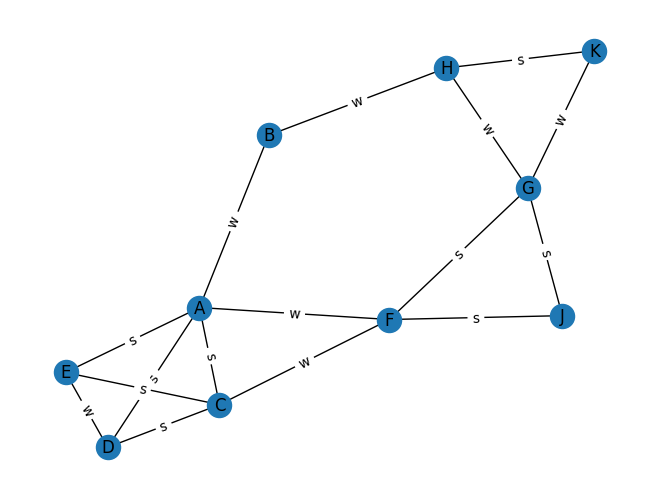

In [22]:
# Hier staat een netwerk waarmee je je code kunt testen
# Je kunt ook zelf dingen veranderen in deze cel

G = nx.Graph()
G.add_edges_from([('D', 'E'), ('C', 'F'), ('A', 'F'), ('G', 'K'), ('G', 'H'),
                  ('H', 'B'), ('A', 'B')],
                 tie='w')
G.add_edges_from([('D', 'C'), ('D', 'A'), ('C', 'A'), ('E', 'A'), ('E', 'C'),
                  ('F', 'J'), ('F', 'G'), ('J', 'G'), ('K', 'H')],
                 tie='s')

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
my_edge_labels = {(u,v,): d['tie']
                   for u, v, d in G.edges(data=True)
                 }

nx.draw_networkx_edge_labels(G, pos, edge_labels=my_edge_labels);

## Vraag 10

Schrijf de Python functie `STC_node(G, n)` die voor een knoop `n` in een willekeurige invoer  graaf `G`, met sterke en zwakke relaties zoals hierboven, uitzoekt of die knoop voldoet aan Strong Triadic Closure.

* Als node `n` voldoet aan de Strong Triadic Closure eigenschap return dan de lege verzameling.
* Zo niet geef dan de verzameling van alle driehoeken waarvan `n` 1 van de knopen is en die niet voldoen aan de STC eigenschap. 
    * De verzameling heeft de vorm `{frozenset({'A', 'C', 'D'}), frozenset({'A', 'E', 'D'})}`. 
        * **waarbij `{'A', 'C', 'D'}` een `frozenset` is**
        * Die maak je heel makkelijk met `frozenset(('A', 'C', 'D'))`
        * Je moet frozensets gebruiken omdat verzamelingen geen immutables mogen bevatten
    *  Dus de "ongesloten driehoekjes" representeren we als verzamelingen

1.            Check dat [Figuur 3.5](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch03.pdf) inderdaad voldoet aan de STC.    Dit is het netwerk `G` wat boven gedefinieerd is.       
2.            Verander wat in Fig 3.5 zodat STC niet meer opgaat en draai je programma opnieuw. Doe dit door een copy van het netwerk `G` te maken. 

#### Hint: 
Zoals te zien in voorbeeldgraaf `G` hebben alle edges het attribuut `tie`. Deze kun je opvragen door `G[u][v]['tie']` voor edge `(u,v)`

In [23]:
def STC_node(G, v):
    # Strong Triadic Closure Property at each node: if the node has strong ties
    # to two neighbors, then these neighbors must have at least a weak tie between them
    triangles = []
    for u in G.neighbors(v):
        for x in G.neighbors(u):
            if x != v:
                if G.has_edge(v, x):
                    triangle = frozenset([v, u, x])
                    triangles.append(triangle)

    violating_triangles = []
    for triangle in triangles:
        for node in triangle:
            other_nodes = triangle - {node}
            if G[node][min(other_nodes)]['tie'] == 'W' or G[node][max(other_nodes)]['tie'] == 'W':
                violating_triangles.append(triangle)
                break
    if not violating_triangles:
        return set()
    else:
        return set(violating_triangles)
    
# test

for N in sorted(G):
    print(N, not bool(STC_node(G,N)), STC_node(G,N))

A True set()
B True set()
C True set()
D True set()
E True set()
F True set()
G True set()
H True set()
J True set()
K True set()


In [24]:
 
assert_equal(type(STC_node(G, 'A')) == set , True)



## Vraag 11

Schrijf nu de Python functie `STC_graph(G)` die voor de hele graaf `G` uitzoekt of `G` voldoet aan Strong Triadic Closure (dit betekent dat elke knoop er aan voldoet).


* Als G voldoet aan de Strong Triadic Closure eigenschap return dan de lege verzameling.
* Zo niet return dan net zoals bij `STC_node` voor `STC_graph(G)`, de verzameling  met alle driehoeken (weer als frozensets)  die een tegenvoorbeeld voor STC zijn.    


          
#### Hint:
Je gebruikt natuurlijk `STC_node(G, x)` om `STC_graph(G)` te bepalen. Want de laatste is waar als de eerste waar is voor elke knoop in `G`.

In [25]:
def STC_graph(G):
     
    #WRITE YOUR CODE HERE

SyntaxError: incomplete input (2126049714.py, line 3)

In [26]:
 
assert_equal(type(STC_graph(G)) == set  , True)


NameError: name 'STC_graph' is not defined